<a href="https://colab.research.google.com/github/inamansari21/datascience/blob/main/Clustering_airlines_new_assng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
data=pd.read_excel("Airlines.xlsx")


In [21]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [22]:
data.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [23]:
data.shape


(3999, 12)

In [24]:
data.dtypes


ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [25]:
data.describe()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [26]:
data.cc1_miles.unique()


array([1, 4, 3, 2, 5])

In [27]:
data.cc2_miles.unique()


array([1, 2, 3])

In [28]:
data.cc3_miles.unique()


array([1, 3, 2, 4, 5])

In [29]:
data.columns.shape


(12,)

In [30]:
data.min()

ID#                  1
Balance              0
Qual_miles           0
cc1_miles            1
cc2_miles            1
cc3_miles            1
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    2
Award?               0
dtype: int64

In [31]:
data.count()

ID#                  3999
Balance              3999
Qual_miles           3999
cc1_miles            3999
cc2_miles            3999
cc3_miles            3999
Bonus_miles          3999
Bonus_trans          3999
Flight_miles_12mo    3999
Flight_trans_12      3999
Days_since_enroll    3999
Award?               3999
dtype: int64

In [32]:
data.min()

ID#                  1
Balance              0
Qual_miles           0
cc1_miles            1
cc2_miles            1
cc3_miles            1
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    2
Award?               0
dtype: int64

In [33]:
data.max()

ID#                     4021
Balance              1704838
Qual_miles             11148
cc1_miles                  5
cc2_miles                  3
cc3_miles                  5
Bonus_miles           263685
Bonus_trans               86
Flight_miles_12mo      30817
Flight_trans_12           53
Days_since_enroll       8296
Award?                     1
dtype: int64

In [34]:
data.var()

ID#                  1.347374e+06
Balance              1.015573e+10
Qual_miles           5.985557e+05
cc1_miles            1.895907e+00
cc2_miles            2.180060e-02
cc3_miles            3.811896e-02
Bonus_miles          5.832692e+08
Bonus_trans          9.223317e+01
Flight_miles_12mo    1.960586e+06
Flight_trans_12      1.438816e+01
Days_since_enroll    4.264781e+06
Award?               2.332473e-01
dtype: float64

In [35]:
data.kurt()

ID#                   -1.199648
Balance               44.157932
Qual_miles            67.689351
cc1_miles             -0.748508
cc2_miles            133.786489
cc3_miles            308.654728
Bonus_miles           13.630489
Bonus_trans            2.745737
Flight_miles_12mo     94.761019
Flight_trans_12       42.978152
Days_since_enroll     -0.967505
Award?                -1.712272
dtype: float64

In [36]:
data['Award?'].value_counts()## Wheather  the Passanger get Free ticket or Not 0 & 1 0 has higher values  


0    2518
1    1481
Name: Award?, dtype: int64

In [37]:
data.isnull().sum()


ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [38]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


## Plots and Graphs

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


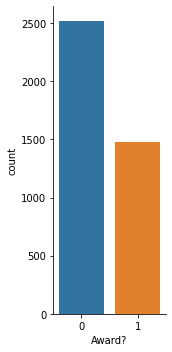

In [39]:
sns.factorplot("Award?",data=data,kind='count',size=5,aspect=.5)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


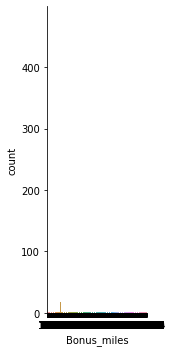

In [40]:
sns.factorplot("Bonus_miles",data=data,kind='count',size=5,aspect=.5)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


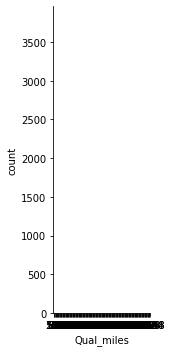

In [41]:
sns.factorplot("Qual_miles",data=data,kind='count',size=5,aspect=.5)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


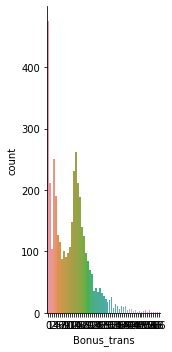

In [42]:
sns.factorplot("Bonus_trans",data=data,kind='count',size=5,aspect=.5)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


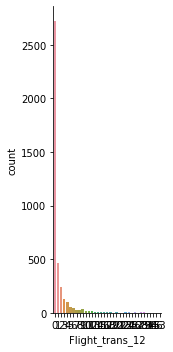

In [43]:
sns.factorplot("Flight_trans_12",data=data,kind='count',size=5,aspect=.5)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


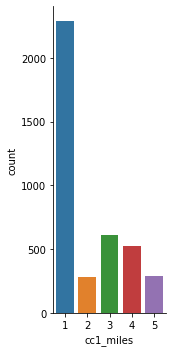

In [44]:
sns.factorplot("cc1_miles",data=data,kind='count',size=5,aspect=.5)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


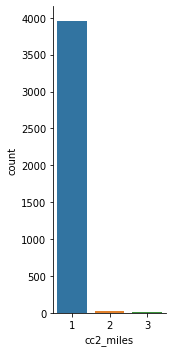

In [45]:
sns.factorplot("cc2_miles",data=data,kind='count',size=5,aspect=.5)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


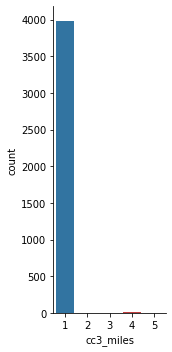

In [46]:
sns.factorplot("cc3_miles",data=data,kind='count',size=5,aspect=.5)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


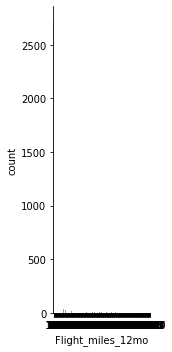

In [47]:
sns.factorplot("Flight_miles_12mo",data=data,kind='count',size=5,aspect=.5)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


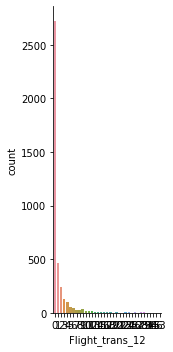

In [48]:
sns.factorplot("Flight_trans_12",data=data,kind='count',size=5,aspect=.5)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


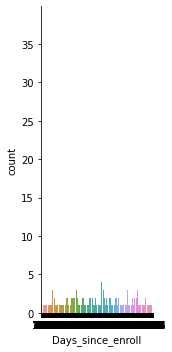

In [49]:
sns.factorplot("Days_since_enroll",data=data,kind='count',size=5,aspect=.5)
plt.show()


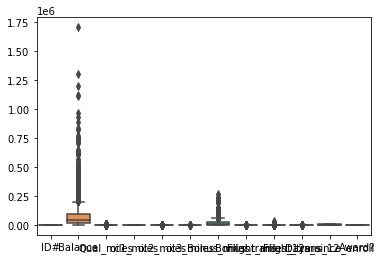

In [50]:
sns.boxplot(data=data)


## Normalisation and Standardisation

In [51]:
def nrml_data(i):
    x=(i-i.min())/(i.max()-i.min())
    return x


In [52]:
normal_data = nrml_data(data)


In [53]:
normal_data


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.000000,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.000249,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.000498,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.000746,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.000995,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.999005,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.999254,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.999502,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.999751,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


## Dendogram creation

In [54]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering


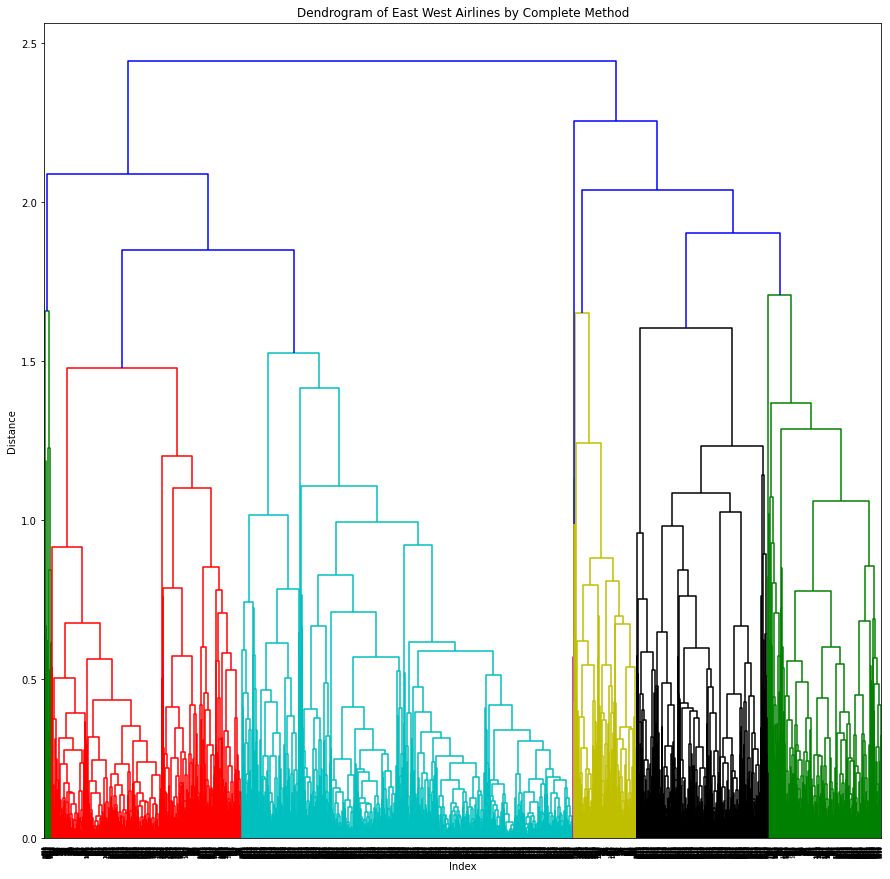

In [55]:
rk=linkage(normal_data,method='complete',metric='euclidean')
plt.figure(figsize=(15,15))
plt.title("Dendrogram of East West Airlines by Complete Method")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(rk,)
plt.show()


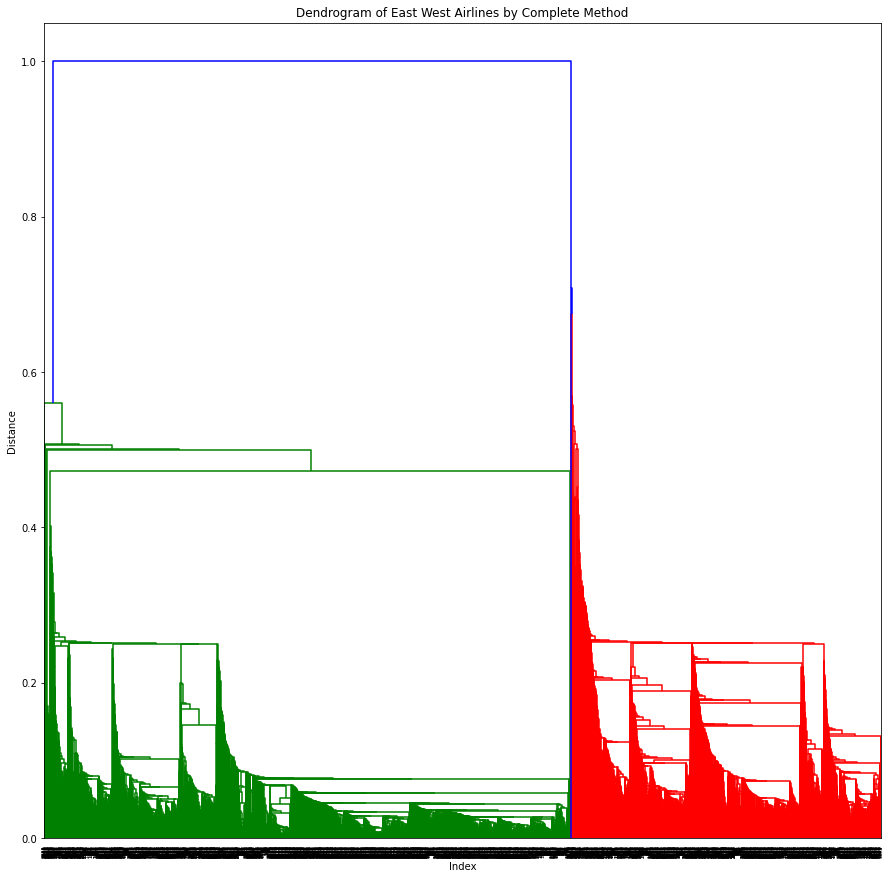

In [56]:
rk=linkage(normal_data,method="single",metric="euclidean")
plt.figure(figsize=(15,15))
plt.title("Dendrogram of East West Airlines by Complete Method")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(rk)
plt.show()


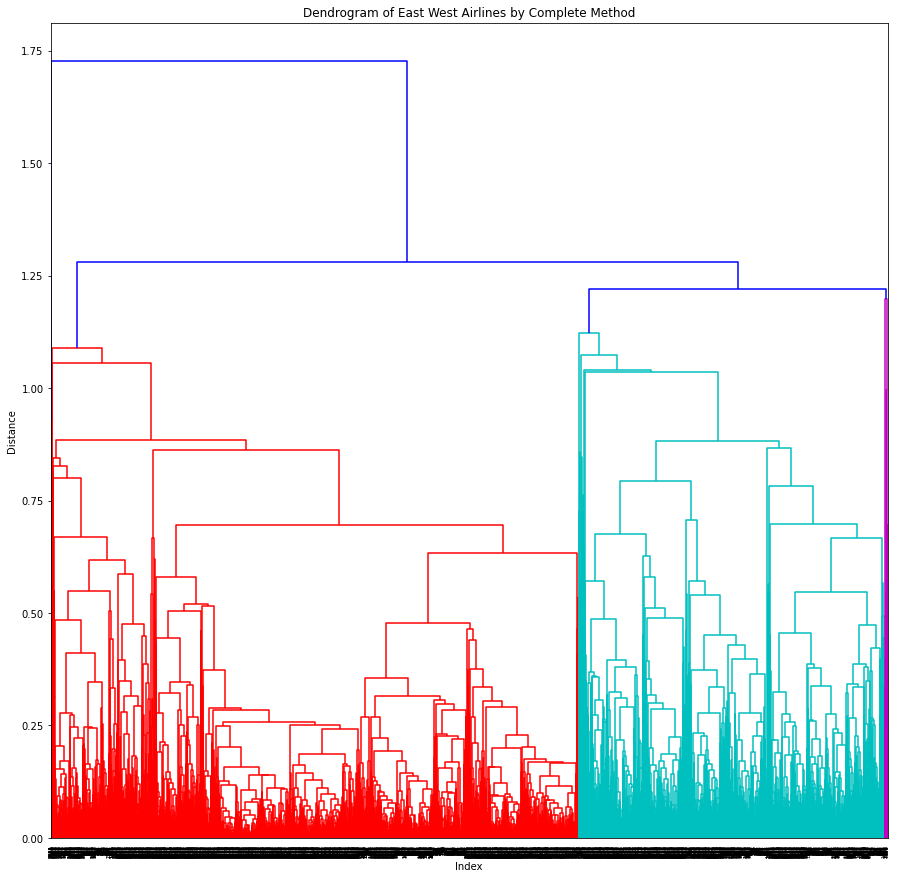

In [57]:
rk=linkage(normal_data,method='average',metric='euclidean')
plt.figure(figsize=(15,15))
plt.title("Dendrogram of East West Airlines by Complete Method")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(rk)
plt.show()


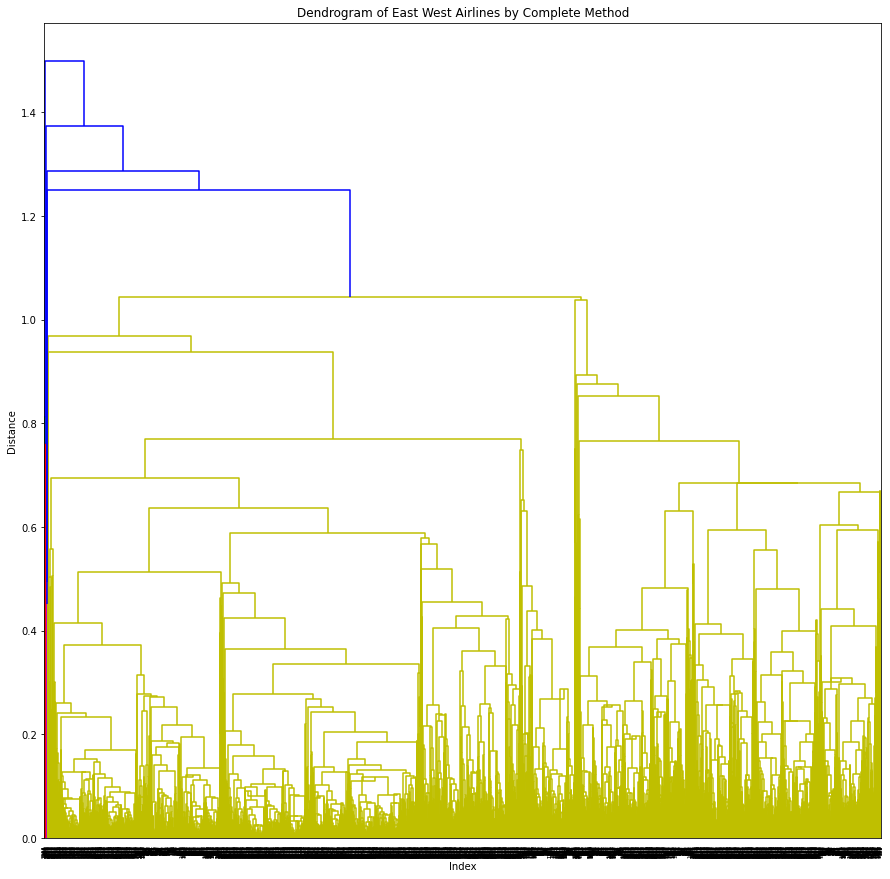

In [58]:
rk=linkage(normal_data,method='centroid',metric='euclidean')
plt.figure(figsize=(15,15))
plt.title("Dendrogram of East West Airlines by Complete Method")
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(rk)
plt.show()


Now We Form Clusters based on Dendrogram


In [59]:
from sklearn.cluster import AgglomerativeClustering
hc_clusters=AgglomerativeClustering(n_clusters=7 ,linkage='complete',affinity='euclidean' ,).fit(normal_data)
clusters=pd.Series(hc_clusters.labels_)
clusters


0       6
1       6
2       6
3       6
4       0
       ..
3994    2
3995    2
3996    2
3997    3
3998    3
Length: 3999, dtype: int64

In [60]:
data['Clusters']=clusters


In [61]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,6
1,2,19244,0,1,1,1,215,2,0,0,6968,0,6
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,6
3,4,14776,0,1,1,1,500,1,0,0,6952,0,6
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [62]:
data.iloc[:,0:].groupby(data['Clusters']).mean()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
Clusters,,,,,,,,,,,,,
0,1201.632841,120206.490775,154.529520,4.121771,1.001845,1.044280,51732.154982,20.808118,762.031365,2.302583,5548.643911,1.000000,0
1,2113.857143,55387.685714,28.571429,1.028571,2.428571,1.000000,14254.571429,16.342857,398.657143,1.771429,4139.228571,0.285714,1
2,2716.744817,65604.537480,196.371611,2.020734,1.009569,1.001595,17800.588517,13.043062,781.886762,2.358852,2943.051037,1.000000,2
3,2902.386220,46942.534766,102.988622,1.510114,1.000632,1.005057,7686.658028,8.541087,233.170670,0.650442,2528.217446,0.000000,3
4,684.607383,121041.607383,491.486577,1.409396,1.000000,1.006711,10519.322148,11.456376,928.362416,2.949664,6483.204698,1.000000,4
5,3128.000000,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,5
6,900.652031,82596.805708,63.287596,2.063666,1.000000,1.015368,14605.867179,10.060373,216.441273,0.657519,6072.614709,0.000000,6


In [63]:
data['Clusters'].value_counts()


3    1582
6     911
2     627
0     542
4     298
1      35
5       4
Name: Clusters, dtype: int64

In [64]:
data1=data[(data.Clusters == 0)]
data1


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,0
11,12,96522,0,5,1,1,61105,19,0,0,6924,1,0
15,16,28495,0,4,1,1,49442,15,0,0,6912,1,0
16,17,51890,0,4,1,1,48963,16,0,0,6910,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2549,2568,140398,0,5,1,1,118013,26,1100,4,2972,1,0
2553,2572,34781,0,3,1,1,11270,12,0,0,2859,1,0
2554,2573,22457,0,3,1,1,17579,15,0,0,2858,1,0
2561,2580,40702,0,4,1,1,39897,14,0,0,2826,1,0


In [65]:
data1=data[(data.Clusters == 1)]
data1


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
198,202,8669,0,1,3,1,11397,16,0,0,7486,1,1
226,230,117329,0,1,2,1,6448,11,0,0,7416,1,1
381,386,167670,0,1,3,1,15907,13,0,0,6994,0,1
392,398,11189,0,1,2,1,9044,20,0,0,8296,1,1
561,568,380930,0,2,2,1,22485,25,213,1,6539,1,1
794,804,55610,0,1,2,1,5095,13,0,0,6151,0,1
940,951,44824,0,1,3,1,21107,19,2000,4,5916,1,1
1149,1161,84856,0,1,2,1,6894,13,0,0,5547,0,1
1270,1283,16103,0,1,3,1,10819,13,0,0,5427,0,1
1383,1397,18154,0,1,2,1,7748,16,0,0,5310,1,1


In [66]:
data1=data[(data.Clusters == 2)]
data1


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
1039,1050,57434,0,2,1,1,11140,16,0,0,5770,1,2
1096,1108,68610,0,2,1,1,6115,12,0,0,5349,1,2
1136,1148,24418,0,2,1,1,12533,13,0,0,5626,1,2
1164,1176,23379,0,2,1,1,11712,25,0,0,5499,1,2
1170,1182,56451,0,2,1,1,9302,11,0,0,5597,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3987,4010,11933,0,1,1,1,249,3,79,1,1412,1,2
3989,4012,2622,0,1,1,1,1625,6,0,0,1404,1,2
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,2
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,2


In [67]:
data1=data[(data.Clusters == 3)]
data1


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
1109,1121,73640,0,2,1,1,10192,14,0,0,5156,0,3
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,3
1234,1247,33020,0,1,1,1,6155,25,1500,3,5322,0,3
1248,1261,81291,0,2,1,1,10522,14,1430,1,5154,0,3
1287,1300,21599,0,2,1,1,5561,13,0,0,5302,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,3
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,3
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,3


In [68]:
data1=data[(data.Clusters == 4)]
data1


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,4
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,4
17,18,13958,0,1,1,1,4291,5,0,0,6905,1,4
18,19,91473,0,3,1,1,27408,17,0,0,6903,1,4
19,20,23354,0,3,1,1,10447,5,0,0,6896,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,1638,194949,0,1,1,1,10121,13,4621,10,4930,1,4
1667,1683,25688,2396,1,1,1,3103,10,0,0,4754,1,4
1669,1685,288379,0,1,1,1,15942,8,1442,5,4741,1,4
1698,1714,192108,1000,1,1,1,10200,3,200,2,4656,1,4


In [69]:
data1=data[(data.Clusters == 5)]
data1


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
2015,2032,53232,888,4,1,1,80696,65,22100,45,3831,1,5
3235,3257,287033,0,1,1,1,26161,58,12873,53,2272,1,5
3583,3606,160114,500,1,1,1,71954,86,30817,53,1373,1,5
3594,3617,27619,0,4,1,1,83726,68,14050,46,1325,1,5
